# ***Inteligencia Artificial***

## **Ingeniería Civil en Computación e Informática - Universidad Mayor.**

Docente: Jorge Alexis Castillo Sepúlveda, PhD & Math.Eng.

Estudiantes: Sebastian Valenzuela Ramirez - Ismael Herrada Escudero.

**PROYECTO IA | IMPLEMENTANDO UNA RED NEURONAL CONVOLUCIONAL**

En este proyecto veremos una implementación de una red neuronal convolucional para reconocer imágenes en relacion a la database **fashion_mnist** (Know Your Data), usando como input imagenes de ropa en especifica.

### **DATABASE FASHION_MNIST**

Es un conjunto de datos de imágenes que se basa en 70.000 ejemplos, los cuales se dividen en un conjunto de entrenamiento que consta de 60.000 ejemplos y un conjunto de prueba que consta de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28*28, asociadas a sus etiquetas especificas. Know Your Data (https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=fashion_mnist)

Las 10 clases de Fashion_mnist son:


*   T-shirt
*   Trouser
*   Pullover
*   Dress
*   Coat
*   Sandal
*   Shirt
*   Sneaker
*   Bag
*   Ankle boot



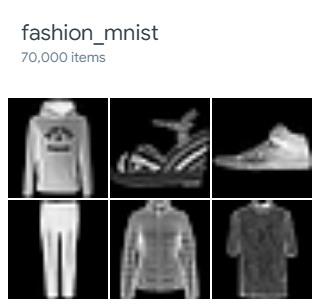

In [ ]:
#Lo primero que se debe realizar es instalar TensorFlow, descomentando y ejecutando la linea de codigo siguiente:
#!pip install tensorflow

In [28]:
#Se carga el dataset desde TensorFlow.
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#Se carga el conjunto con el metodo load_data(), obteniendo dos tuplas, la primera contiene los datos de entrenamiento y la segunda tupla los datos de prueba.

# **PREPROCESAMIENTO DE DATOS**

In [29]:
#Se realizan los import de las librerias.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [30]:
#Normalizando los datos de imagen, dividiendo cada pixel en 255.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


# **MODELAMIENTO**

In [31]:
#Creando el modelo
model = Sequential()#Apila capas de manera sequencial.

#Agregando capas convolucionales.
#Se agregan dos capas convolucionales, teniendo una capa de 32 filtros de 3 por 3.
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))#Imagenes en escala de grises de 28x28 pixeles.
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # se añade el pooling para reducir dimension espacial.
model.add(Dropout(0.25)) # se quita el 25% de neuronas.

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Flatten convierte la matriz 3D en una matriz 1D.
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#Compilando el modelo con optimizador Adam.
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **ENTRENAMIENTO**

In [32]:
#Entrenando el modelo de Red Neuronal.
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.4740 - accuracy: 0.8259 - val_loss: 0.3085 - val_accuracy: 0.8888
Epoch 2/10
1875/1875 [==============================] - 167s 89ms/step - loss: 0.3032 - accuracy: 0.8886 - val_loss: 0.2645 - val_accuracy: 0.9036
Epoch 3/10
1875/1875 [==============================] - 166s 88ms/step - loss: 0.2690 - accuracy: 0.9006 - val_loss: 0.2569 - val_accuracy: 0.9043
Epoch 4/10
1875/1875 [==============================] - 170s 91ms/step - loss: 0.2408 - accuracy: 0.9110 - val_loss: 0.2727 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 168s 90ms/step - loss: 0.2278 - accuracy: 0.9158 - val_loss: 0.2261 - val_accuracy: 0.9146
Epoch 6/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.2119 - accuracy: 0.9210 - val_loss: 0.2233 - val_accuracy: 0.9165
Epoch 7/10
1875/1875 [==============================] - 169s 90ms/step - loss: 0.2015 - accuracy: 0.9249 - val_loss: 0

# **PREDICCIÓN**

In [33]:
#Solo para efectos de demostración, elegimos la primera imagen del conjunto de pruebas, pero puede ser cualquiera que cumpla con el formato.
new_image = X_test[0]

In [34]:
#Por lo tanto, se debe agregar una dimensión adicional al array.
import numpy as np
new_image = np.expand_dims(new_image, axis=0)

#Predict de tu modelo para predecir la clase de la nueva imagen.
prediction = model.predict(new_image)

#"prediction" será un array de 10 elementos, donde cada elemento es la probabilidad de que la imagen pertenezca a esa clase.
#Puedes usar np.argmax para encontrar el índice del elemento con la mayor probabilidad, que es la predicción de la clase de la imagen.
predicted_class = np.argmax(prediction)

#Imprime la clase predicha.
print(f'La clase predicha es:{predicted_class}')

1/1 [==============================] - 0s 110ms/step
La clase predicha es:9


**Con lo siguiente se realizara una verificación de la clase predicha:**

In [35]:
#Obtenemos la etiqueta one-hot de la primera imagen del conjunto de pruebas.
real_class = y_test[0]#Almacenara el primer valor de la etiqueta.
#Imprime en la consola la clase real.
print(f'La clase real es: {real_class}')

La clase real es: 9


In [36]:
for i in range(100,120):
    new_image = X_test[i]
    new_image = np.expand_dims(new_image, axis=0)
    prediction = model.predict(new_image)#Hace uso del moelo entrenado para hacer una predicción.
    predicted_class = np.argmax(prediction)
    print(f'Imagen {i}: clase predicha {predicted_class}')#Imprime el numero de la imagen y la clase predicha correspondiente.
    clase_real = y_test[i]
    print(f'Imagen {i}: clase real {clase_real}')#Imprime el numero de la imagen y la clase real correspondiente.

1/1 [==============================] - 0s 25ms/step
Imagen 100: clase predicha 3
Imagen 100: clase real 3
1/1 [==============================] - 0s 24ms/step
Imagen 101: clase predicha 6
Imagen 101: clase real 6
1/1 [==============================] - 0s 27ms/step
Imagen 102: clase predicha 7
Imagen 102: clase real 7
1/1 [==============================] - 0s 28ms/step
Imagen 103: clase predicha 2
Imagen 103: clase real 2
1/1 [==============================] - 0s 25ms/step
Imagen 104: clase predicha 7
Imagen 104: clase real 7
1/1 [==============================] - 0s 27ms/step
Imagen 105: clase predicha 8
Imagen 105: clase real 8
1/1 [==============================] - 0s 23ms/step
Imagen 106: clase predicha 5
Imagen 106: clase real 5
1/1 [==============================] - 0s 24ms/step
Imagen 107: clase predicha 7
Imagen 107: clase real 9
1/1 [==============================] - 0s 22ms/step
Imagen 108: clase predicha 9
Imagen 108: clase real 9
1/1 [==============================] - 0s 19ms

In [ ]:
#Es necesario instalar tensorFlowJS, para eso se debe descomentar la siguiente linea de codigo:
#!pip install tensorflowjs

In [ ]:
#Exportacion del modelo a h5.
model.save('clasificadorNuevo.h5')

In [ ]:
# Convertir el archivo h5 a formato tensorflowjs.
!mkdir clasificadorNuevo
!tensorflowjs_converter --input_format keras clasificadorNuevo.h5 clasificadorNuevo_tfjs

2023-07-06 23:36:24.212510: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
#Transformar.
import shutil
shutil.make_archive("/content/clasificadorNuevo_tfjs", 'zip', "/content/clasificadorNuevo_tfjs")

'/content/clasificadorNuevo_tfjs.zip'

In [ ]:
#Descarga el archivo como zip.
from google.colab import files
files.download('/content/clasificadorNuevo_tfjs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>